In [1]:
import os
import pandas as pd
%matplotlib inline

from dotenv import load_dotenv
from pathlib import Path
from newsapi.newsapi_client import NewsApiClient
from datetime import date, datetime, timedelta

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
rel_path = Path('../../../../Python/.env')
load_dotenv(rel_path) 

True

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API"])

In [5]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []
for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
btc  = pd.DataFrame(sentiments)
btc.head()

,Compound,Negative,Neutral,Positive,text
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...
1,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...
2,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...
4,0.1280,0.000,0.951,0.049,Image copyrightAFP/REUTERSImage caption\r\n Ki...


In [8]:
# Create the ethereum sentiment scores DataFrame
sentiments = []
for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
eth  = pd.DataFrame(sentiments)
eth.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio..."
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Cryptocurrency Investment ...
2,0.5574,0.0,0.863,0.137,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo..."
3,0.2263,0.0,0.947,0.053,"When the inventor of AWS Lambda, Tim Wagner, a..."
4,0.7316,0.0,0.834,0.166,I was perusing the crypto markets today and no...


In [9]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Negative,Neutral,Positive
count,20.00000,20.000000,20.000000,20.000000
mean,-0.19796,0.068050,0.901750,0.030150
std,0.37825,0.078697,0.088594,0.040888
min,-0.86890,0.000000,0.687000,0.000000
25%,-0.45910,0.000000,0.848250,0.000000
50%,-0.07655,0.060500,0.916000,0.000000
75%,0.00645,0.103750,0.971500,0.052000
max,0.59940,0.277000,1.000000,0.149000


In [10]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Negative,Neutral,Positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.293394,0.042125,0.852250,0.105625
std,0.409885,0.048503,0.097511,0.081672
min,-0.451900,0.000000,0.660000,0.000000
25%,0.000000,0.000000,0.802500,0.039750
50%,0.381550,0.024500,0.855000,0.119000
75%,0.647875,0.078250,0.919000,0.170000
max,0.731600,0.130000,1.000000,0.226000


In [61]:
compound_data = {'Bitcoin_Compound': btc.Compound, 'Ethereum_Compound': eth.Compound}
compound_df = pd.DataFrame(compound_data)
compound_df.head()

,Bitcoin_Compound,Ethereum_Compound
0,0.0258,0.0000
1,0.0772,0.0000
2,0.0000,0.5574
3,0.5994,0.2263
4,0.1280,0.7316


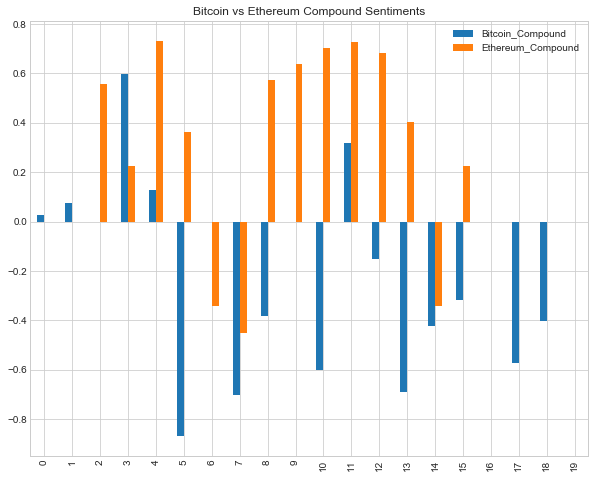

In [62]:
compound_df.plot(
    y=["Bitcoin_Compound", "Ethereum_Compound"],
    kind="bar",
    title="Bitcoin vs Ethereum Compound Sentiments",
    figsize=(10, 8),
    grid=True,
)

In [63]:
compound_df.describe()

,Bitcoin_Compound,Ethereum_Compound
count,20.00000,16.000000
mean,-0.19796,0.293394
std,0.37825,0.409885
min,-0.86890,-0.451900
25%,-0.45910,0.000000
50%,-0.07655,0.381550
75%,0.00645,0.647875
max,0.59940,0.731600


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score

Q: Which coin had the highest compound score?

A: Ethereum had the max compount score

Q. Which coin had the highest positive score?

A: Ethereum had the max positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('chars')
stop.append("''")
stop = set(stop)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    #words = list(filter(lambda w: w.lower(), words))
    words = [word.lower() for word in words]
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens


In [14]:
# Create a new tokens column for bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...,"[hacker, burning, 0day, like, ’, fire, sale, i..."
1,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...,"[reuters, previously, reported, fbi, would, la..."
2,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...,"[account, tweeted, variant, message, someone, ..."
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...,"[investigation, cooperation, law, enforcement,..."
4,0.1280,0.000,0.951,0.049,Image copyrightAFP/REUTERSImage caption\r\n Ki...,"[image, copyrightafp/reutersimage, caption, ki..."


In [15]:
# Create a new tokens column for ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio...","[sparrow, exchange, bitcoin, ethereum, option,..."
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Cryptocurrency Investment ...,"[tl, dr, complete, cryptocurrency, investment,..."
2,0.5574,0.0,0.863,0.137,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...","[introducing, web3torrent, june, 18, 2020, tod..."
3,0.2263,0.0,0.947,0.053,"When the inventor of AWS Lambda, Tim Wagner, a...","[inventor, aws, lambda, tim, wagner, former, h..."
4,0.7316,0.0,0.834,0.166,I was perusing the crypto markets today and no...,"[perusing, crypto, market, today, noticed, tet..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('elon', 'musk'), 6),
 (('bill', 'gate'), 4),
 (('barack', 'obama'), 4),
 (('twitter', 'account'), 3),
 (('joe', 'biden'), 3),
 (('send', 'bitcoin'), 2),
 (('kim', 'kardashian'), 2),
 (('kanye', 'west'), 2),
 (('gate', 'barack'), 2),
 (('cryptocurrency', 'scam'), 2),
 (('gate', 'elon'), 2),
 (('obama', 'joe'), 2),
 (('biden', 'elon'), 2),
 (('public', 'figure'), 2),
 (('hacker', 'burning'), 1),
 (('burning', '0day'), 1),
 (('0day', 'like'), 1),
 (('like', '’'), 1),
 (('’', 'fire'), 1),
 (('fire', 'sale'), 1)]

In [25]:
# Generate the Ethereum N-grams where N=2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('bitcoin', 'ethereum'), 3),
 (('market', 'cap'), 2),
 (('paper', 'wallet'), 2),
 (('weird', 'year'), 2),
 (('sparrow', 'exchange'), 1),
 (('exchange', 'bitcoin'), 1),
 (('ethereum', 'option'), 1),
 (('option', 'trading'), 1),
 (('trading', 'platform'), 1),
 (('platform', 'based'), 1),
 (('based', 'singapore'), 1),
 (('singapore', 'announced'), 1),
 (('announced', 'today'), 1),
 (('today', 'raised'), 1),
 (('raised', '3.5'), 1),
 (('3.5', 'million'), 1),
 (('million', 'series'), 1),
 (('series', 'funding'), 1),
 (('funding', 'round'), 1),
 (('round', 'led'), 1)]

In [26]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('account', 13),
 ('twitter', 12),
 ('bitcoin', 6),
 ('elon', 6),
 ('musk', 6),
 ('investigation', 5),
 ('wednesday', 5),
 ('hacker', 4),
 ('hack', 4),
 ('tweet', 4)]

In [28]:
# Get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('bitcoin', 13),
 ('ethereum', 9),
 ('crypto', 7),
 ('wallet', 5),
 ('cryptocurrency', 4),
 ('today', 3),
 ('june', 3),
 ('web3torrent', 3),
 ('market', 3),
 ('based', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [38]:
# Define a function that will clean up the article text
# -- remove stop words
# -- remove non-letters
# -- lower case words
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [wnl.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [39]:
# Process Bitcoin text
input_words = process_text(btc.text.str.cat())

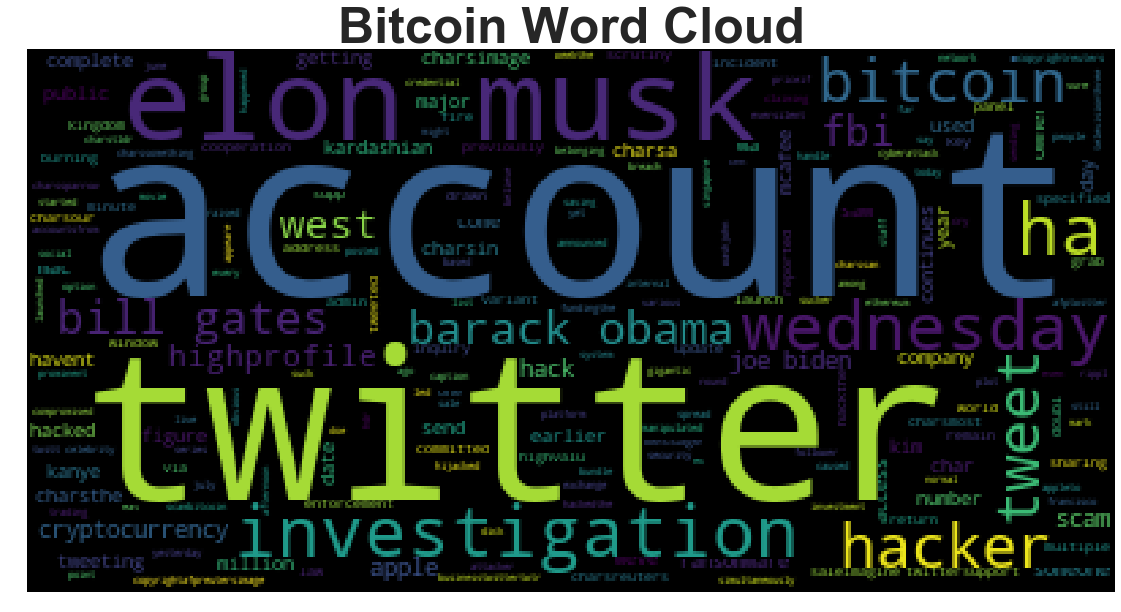

In [40]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(input_words)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

In [43]:
# Define a new fucntion that will function that will process the 
# article with NGram = 2
def process_text_bg(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [wnl.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

In [44]:
# Process Bitcoin text using NGrams
input_bigrams = process_text_bg(btc.text.str.cat())

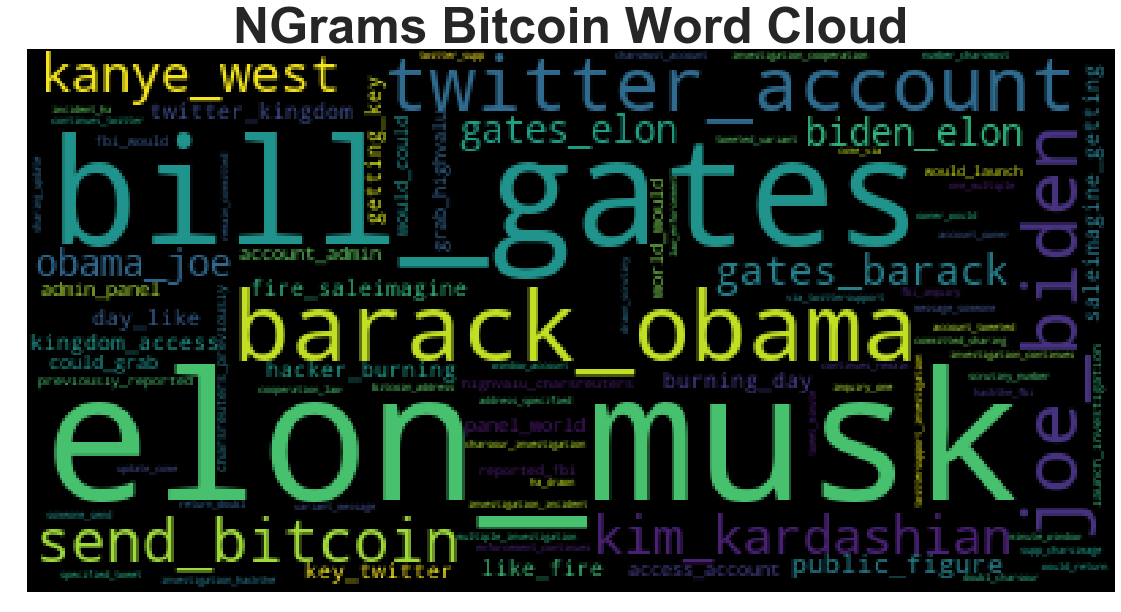

In [46]:
# Generate the NGrams Bitcoin word cloud
wc = WordCloud().generate(input_bigrams)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("NGrams Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

In [47]:
# Process Ethereum text
input_words = process_text(eth.text.str.cat())

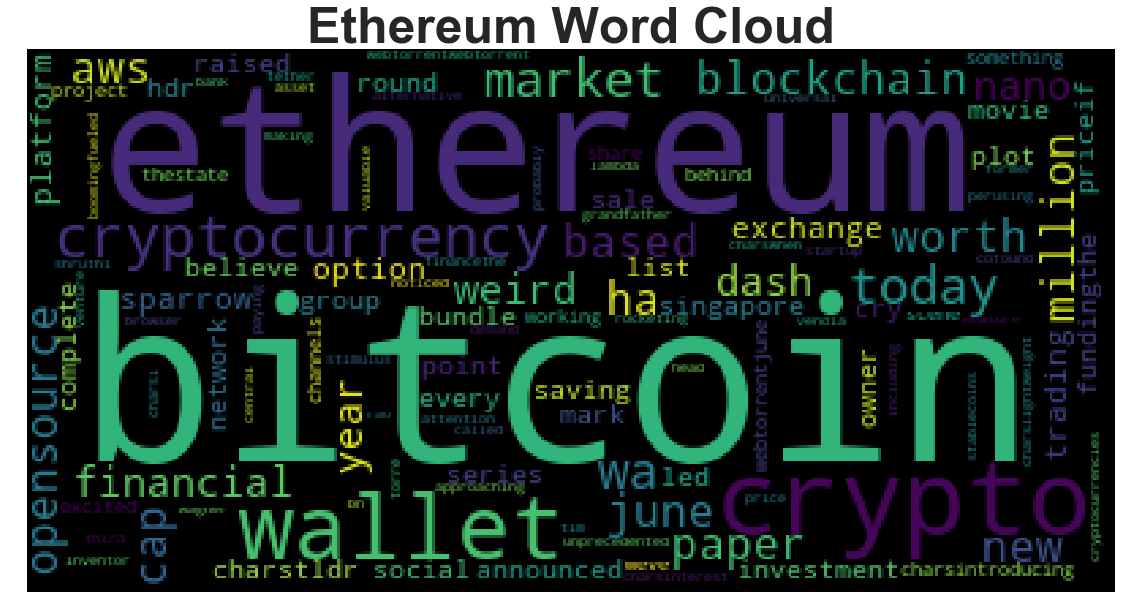

In [51]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(input_words)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

In [49]:
# Process Ethereum text using NGrams
input_bigrams = process_text_bg(eth.text.str.cat())

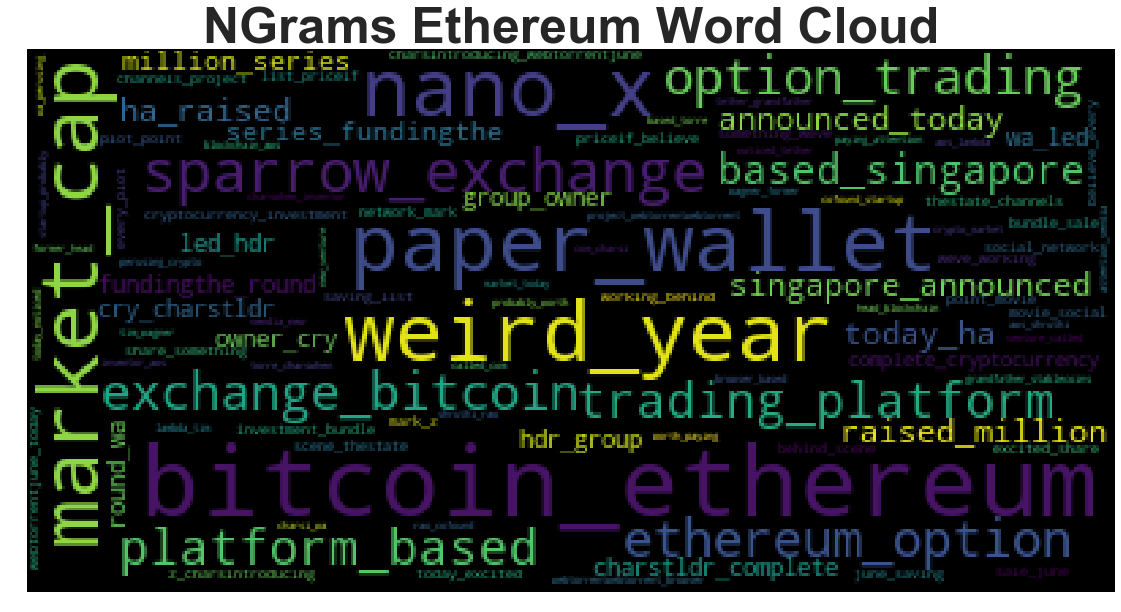

In [50]:
# Generate the NGrams Ethereum word cloud
wc = WordCloud().generate(input_bigrams)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("NGrams Ethereum Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [52]:
import spacy
from spacy import displacy

In [53]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [54]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [55]:
# Concatenate all of the bitcoin text together
bitcoin=btc.text.str.cat()
bitcoin

"Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars]Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations into the incident, which has drawn scrutiny from a number o… [+966 chars]Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars]Our investigation and cooperation with law enforcement continues, and we remain committed to sharing any updates here. More to come via @TwitterSupport as our investigation continues.\r\n— Twitter Supp… [+1321 chars]Image copyrightAFP/REUTERSImage caption\r\n Kim Kardashian West, Kanye West, Elon Musk, Bill Gates and Barack Obama were all 'hacked'\r\nT

In [56]:
# Run the NER processor on all of the text
doc = nlp(bitcoin)

# Add a title to the document
# Render the visualization
doc.user_data["title"] = "Bitcoin NER"
displacy.render(doc, style='ent', jupyter=True)

In [57]:
# List all Entities
doc.ents

(Twitter,
 FBI,
 FBI,
 one,
 Bitcoin,
 30-minute,
 Kanye West,
 Elon Musk,
 Bill Gates,
 Barack Obama,
 FBI,
 Twitt,
 Twitter,
 Wednesday,
 millions,
 @rippl,
 19.21,
 June 25,
 94%,
 The Social Network,
 Mark Z,
 Twitters,
 yesterday,
 Bill Gates,
 Barack Obama,
 Appleto,
 Twitter,
 earlier this week,
 Bitcoin,
 Singapore,
 today,
 $3.5 million,
 HDR Group,
 the year,
 John McAfee
  ,
 Three years ago,
 this date,
 July 17, 2017,
 McAfee,
 ec,
 Francisco,
 CNN,
 Joe Biden,
 Bill Gates,
 Elon Musk,
 Apple,
 Wednesday,
 Twitter,
 earlier this afternoon,
 Elon Musk,
 Wednesday evening,
 6 pm ET,
 Twitter,
 Apple,
 Mac,
 first,
 Mac,
 Barack Obama,
 Joe Biden,
 Elon Musk,
 Kanye West,
 Apple,
 Wednesday,
 Twitter,
 Barack,
 Joe Biden,
 Elon Musk,
 Kim Kardashian,
 Twitters,
 Reuters,
 Twitter,
 Bill Gates,
 Elon Musk,
 bitcoin,
 Wednesday,
 Nvidias,
 September 2020,
 GeForce RTX 30,
 Ampere)

---

## Ethereum NER

In [58]:
# Concatenate all of the ethereum text together
ethereum=eth.text.str.cat()
ethereum

"Sparrow Exchange, a Bitcoin and Ethereum options trading platform based in Singapore, announced today it has raised $3.5 million in Series A funding.\r\nThe round was led by HDR Group, the owner of cry… [+833 chars]TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\r\nIf we're to believe every plot point from the movie The Social Network, Mark Z… [+2756 chars]Introducing Web3Torrent\r\nJune 18, 2020\r\nToday were excited to share something weve been working on behind the scenes of the\r\nState Channels project: Web3Torrent.\r\nWeb3Torrent is a browser based torre… [+10464 chars]When the inventor of AWS Lambda, Tim Wagner, and the former head of blockchain at AWS, Shruthi Rao, co-found a startup, it’s probably worth paying attention. Vendia, as the new venture is called, com… [+4751 chars]I was perusing the crypto markets today and noticed that Tether, the grandfather of all stablecoins, is approaching a $10bn market 

In [59]:
# Run the NER processor on all of the text
doc = nlp(ethereum)

# Add a title to the document
# Render the visualization
doc.user_data["title"] = "Ethereum NER"
displacy.render(doc, style='ent', jupyter=True)

In [60]:
# List all Entities
doc.ents

(Sparrow Exchange,
 Bitcoin,
 Singapore,
 today,
 $3.5 million,
 HDR Group,
 19.21,
 June 25,
 94%,
 The Social Network,
 Mark Z,
 June 18, 2020,
 Today,
 AWS Lambda,
 Tim Wagner,
 Shruthi Rao,
 Vendia,
 today,
 Tether,
 10bn,
 third,
 Bitcoin,
 bitcoin,
 third,
 one,
 DASH,
 Bitcoin,
 2009,
 CRYPTO UNIVERSE Dash,
 Bitcoin,
 two,
 Trumps,
 Bitcoin,
 Bitcoin,
 Ethereum,
 John R. B…,
 Bitcoin,
 Ethereum,
 ERC20,
 The Ledger Nano X Bluetooth,
 89.25,
 Amazon,
 Mandelker,
 U.S. Treasury,
 2018,
 the Department of Justice,
 a weird year,
 year,
 second,
 $60 million,
 June,
 Dune Analytics,
 Bitcoin)